In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# load data
moon_data_provided = pd.read_csv('make_moons.csv')

In [18]:
# check the data
moon_data_provided.head()

,X,Y,label
0,-1.129064,-0.049047,0
1,0.264658,0.960315,0
2,0.604729,0.585562,0
3,-0.603916,0.789943,0
4,-0.591466,0.712346,0


In [19]:
moon_data_provided.shape

(1000, 3)

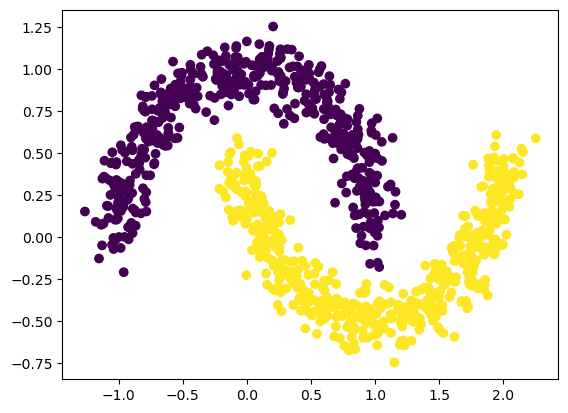

In [21]:
# plot the data
plt.scatter(moon_data_provided['X'], moon_data_provided['Y'], c=moon_data_provided['label'])

In [14]:
# Generate a moons dataset using make_moons(n_samples=10000, noise=0.4)
from sklearn.datasets import make_moons

X_generated, y_generated = make_moons(n_samples=10000, noise=0.4)

In [15]:
# check the data
X_generated.shape, y_generated.shape

((10000, 2), (10000,))

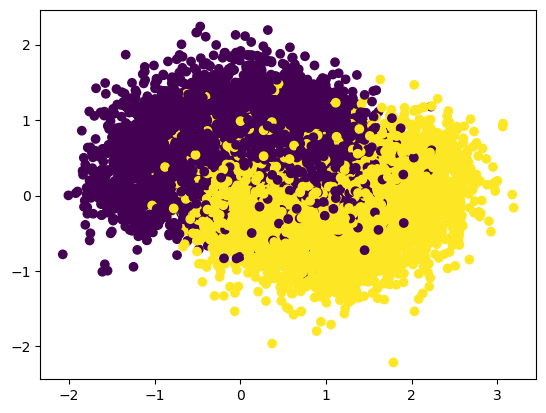

In [16]:
# plot the data
plt.scatter(X_generated[:, 0], X_generated[:, 1], c=y_generated)

In [22]:
# Correcting the provided moon dataset names
X_provided = moon_data_provided[['X', 'Y']].values
y_provided = moon_data_provided['label'].values

In [23]:
# check the data
X_provided.shape, y_provided.shape

((1000, 2), (1000,))

In [24]:
# split the test and train data
from sklearn.model_selection import train_test_split

X_train_provided, X_test_provided, y_train_provided, y_test_provided = train_test_split(X_provided, y_provided, test_size=0.2, random_state=42)

X_train_generated, X_test_generated, y_train_generated, y_test_generated = train_test_split(X_generated, y_generated, test_size=0.2, random_state=42)

In [25]:
# check the data
X_train_provided.shape, X_test_provided.shape, y_train_provided.shape, y_test_provided.shape

((800, 2), (200, 2), (800,), (200,))

In [26]:
# check the generated data
X_train_generated.shape, X_test_generated.shape, y_train_generated.shape, y_test_generated.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [32]:
# train the model
# Define the parameters grid for the GridSearchCV
param_grid = {'max_leaf_nodes': list(range(5, 100, 5))}

param_grid

{'max_leaf_nodes': [5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95]}

In [40]:
# create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=42)

# create a GridSearchCV object for provided data
grid_search_provided = GridSearchCV(dt_clf, param_grid, cv=3, verbose=3, n_jobs=-1)

In [41]:
# train the model
grid_search_provided.fit(X_train_provided, y_train_provided)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                            50, 55, 60, 65, 70, 75, 80, 85, 90,
                                            95]},
             verbose=3)

In [43]:
# get the best parameters
grid_search_provided.best_params_

{'max_leaf_nodes': 15}

In [47]:
# Create a GridSearchCV object for generated data
grid_search_generated = GridSearchCV(dt_clf, param_grid, cv=3, verbose=3, n_jobs=-1)

In [48]:
# train the model
grid_search_generated.fit(X_train_generated, y_train_generated)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                            50, 55, 60, 65, 70, 75, 80, 85, 90,
                                            95]},
             verbose=3)

In [49]:
# get the best parameters
grid_search_generated.best_params_

{'max_leaf_nodes': 20}

In [50]:
# train the model with the best parameters for provided data
best_params_provided = grid_search_provided.best_params_
best_dt_clf_provided = DecisionTreeClassifier(**best_params_provided, random_state=42)

In [51]:
# train the model with the best parameters for generated data
best_params_generated = grid_search_generated.best_params_
best_dt_clf_generated = DecisionTreeClassifier(**best_params_generated, random_state=42)

In [53]:
# train the model with the best parameters for provided data
best_dt_clf_provided.fit(X_train_provided, y_train_provided)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=42)

In [54]:
# train the model with the best parameters for generated data
best_dt_clf_generated.fit(X_train_generated, y_train_generated)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)

In [55]:
# predict the test data for provided data
y_pred_provided = best_dt_clf_provided.predict(X_test_provided)

In [56]:
# predict the test data for generated data
y_pred_generated = best_dt_clf_generated.predict(X_test_generated)

In [57]:
# calculate the accuracy for provided data
from sklearn.metrics import accuracy_score

accuracy_provided = accuracy_score(y_test_provided, y_pred_provided)

In [58]:
accuracy_provided

0.99

In [62]:
test_accuracy_provided = best_dt_clf_provided.score(X_test_provided, y_test_provided)
print("Test accuracy for provided data: ", test_accuracy_provided)

Test accuracy for provided data:  0.99


In [60]:
# calculate the accuracy for generated data
test_accuracy_generated = best_dt_clf_generated.score(X_test_generated, y_test_generated)

In [61]:
test_accuracy_generated

0.8575

In [72]:
accuracy_generated = best_dt_clf_generated.score(X_test_generated, y_test_generated)
print("Test accuracy for generated data: ", accuracy_generated)

Test accuracy for generated data:  0.8575


In [70]:
# plot the decision boundary for provided data
def plot_decision_boundary(clf, X, y, axes=[-2, 3, -2, 2], plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Class 0")

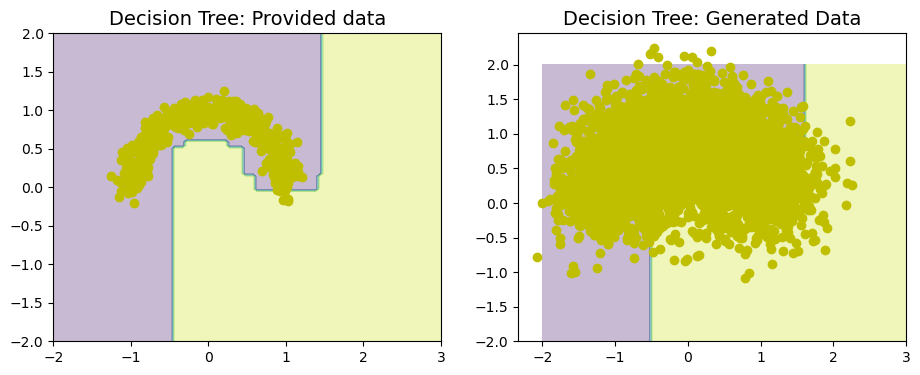

In [71]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(best_dt_clf_provided, X_provided, y_provided)
plt.title("Decision Tree: Provided data", fontsize=14)
plt.subplot(122)
plot_decision_boundary(best_dt_clf_generated, X_generated, y_generated)
plt.title("Decision Tree: Generated Data", fontsize=14)
plt.show()


In [75]:
# trying different values for max_leaf_nodes
param_grid = {'max_leaf_nodes': list(range(2, 100, 9))}

dt_clf = DecisionTreeClassifier(random_state=42)

grid_search_provided_2 = GridSearchCV(dt_clf, param_grid, cv=3, verbose=3, n_jobs=-1)

grid_search_provided_2.fit(X_train_provided, y_train_provided)

grid_search_provided_2.best_params_

Fitting 3 folds for each of 11 candidates, totalling 33 fits


{'max_leaf_nodes': 11}

In [76]:
# train the model with the best parameters for provided data
best_params_provided_2 = grid_search_provided_2.best_params_
best_dt_clf_provided_2 = DecisionTreeClassifier(**best_params_provided_2, random_state=42)

best_dt_clf_provided_2.fit(X_train_provided, y_train_provided)

y_pred_provided_2 = best_dt_clf_provided_2.predict(X_test_provided)

accuracy_provided_2 = accuracy_score(y_test_provided, y_pred_provided_2)

print("Accuracy for provided data with max_leaf_nodes=11: ", accuracy_provided_2)

Accuracy for provided data with max_leaf_nodes=11:  0.99


In [78]:
# trying different values for max_leaf_nodes for generated data
param_grid = {'max_leaf_nodes': list(range(2, 1000))}

grid_search_generated_2 = GridSearchCV(dt_clf, param_grid, cv=3, verbose=3, n_jobs=-1)

grid_search_generated_2.fit(X_train_generated, y_train_generated)

grid_search_generated_2.best_params_

Fitting 3 folds for each of 998 candidates, totalling 2994 fits


{'max_leaf_nodes': 17}

In [79]:
# train the model with the best parameters for generated data
best_params_generated_2 = grid_search_generated_2.best_params_

best_dt_clf_generated_2 = DecisionTreeClassifier(**best_params_generated_2, random_state=42)

best_dt_clf_generated_2.fit(X_train_generated, y_train_generated)

y_pred_generated_2 = best_dt_clf_generated_2.predict(X_test_generated)

accuracy_generated_2 = accuracy_score(y_test_generated, y_pred_generated_2)

print("Accuracy for generated data with max_leaf_nodes=17: ", accuracy_generated_2)

Accuracy for generated data with max_leaf_nodes=17:  0.8575
